<a href="https://colab.research.google.com/github/aryan-at-ul/fellowship_of_medical_imaging/blob/main/image_stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

ddddddfdgdgdfdgjkhskybdfskd ['square_and_circles2_00001.jpg', 'square_and_circles2_00002.jpg', 'square_and_circles2_00003.jpg', 'square_and_circles2_00004.jpg', 'square_and_circles2_00005.jpg', 'square_and_circles2_00006.jpg', 'square_and_circles2_00007.jpg', 'square_and_circles2_00008.jpg', 'square_and_circles2_00009.jpg', 'square_and_circles2_00010.jpg', 'square_and_circles2_00011.jpg']
/content/images2/square_and_circles2_00001.jpg
(1125, 2000)
/content/images2/square_and_circles2_00002.jpg
(1125, 2000)
/content/images2/square_and_circles2_00003.jpg
(1125, 2000)
/content/images2/square_and_circles2_00004.jpg
(1125, 2000)
/content/images2/square_and_circles2_00005.jpg
(1125, 2000)
/content/images2/square_and_circles2_00006.jpg
(1125, 2000)
/content/images2/square_and_circles2_00007.jpg
(1125, 2000)
/content/images2/square_and_circles2_00008.jpg
(1125, 2000)
/content/images2/square_and_circles2_00009.jpg
(1125, 2000)
/content/images2/square_and_circles2_00010.jpg
(1125, 2000)
/content

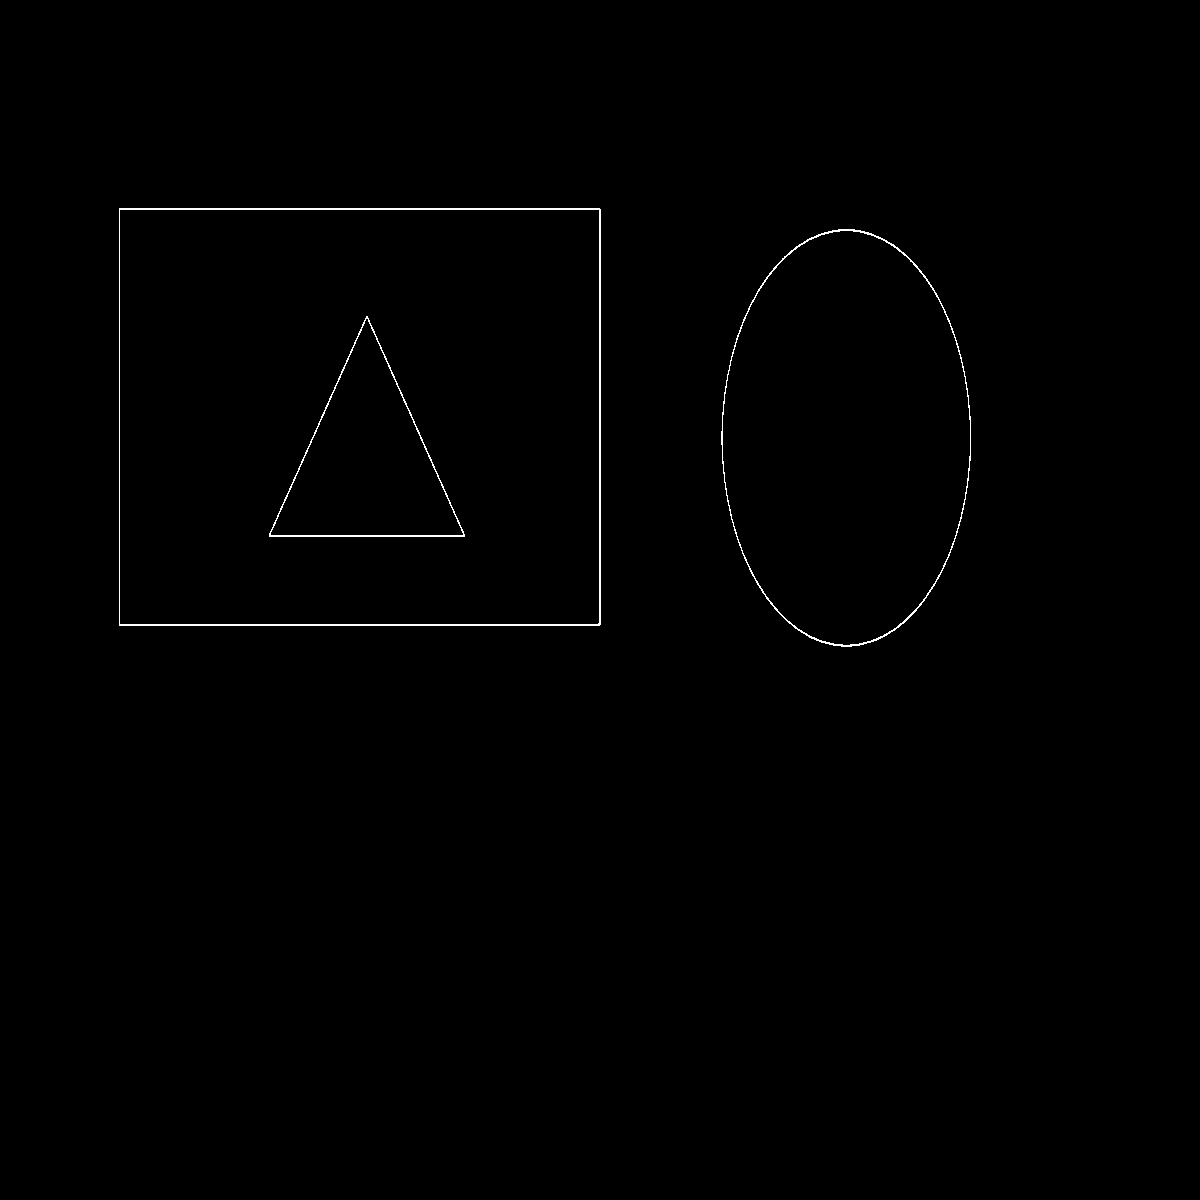

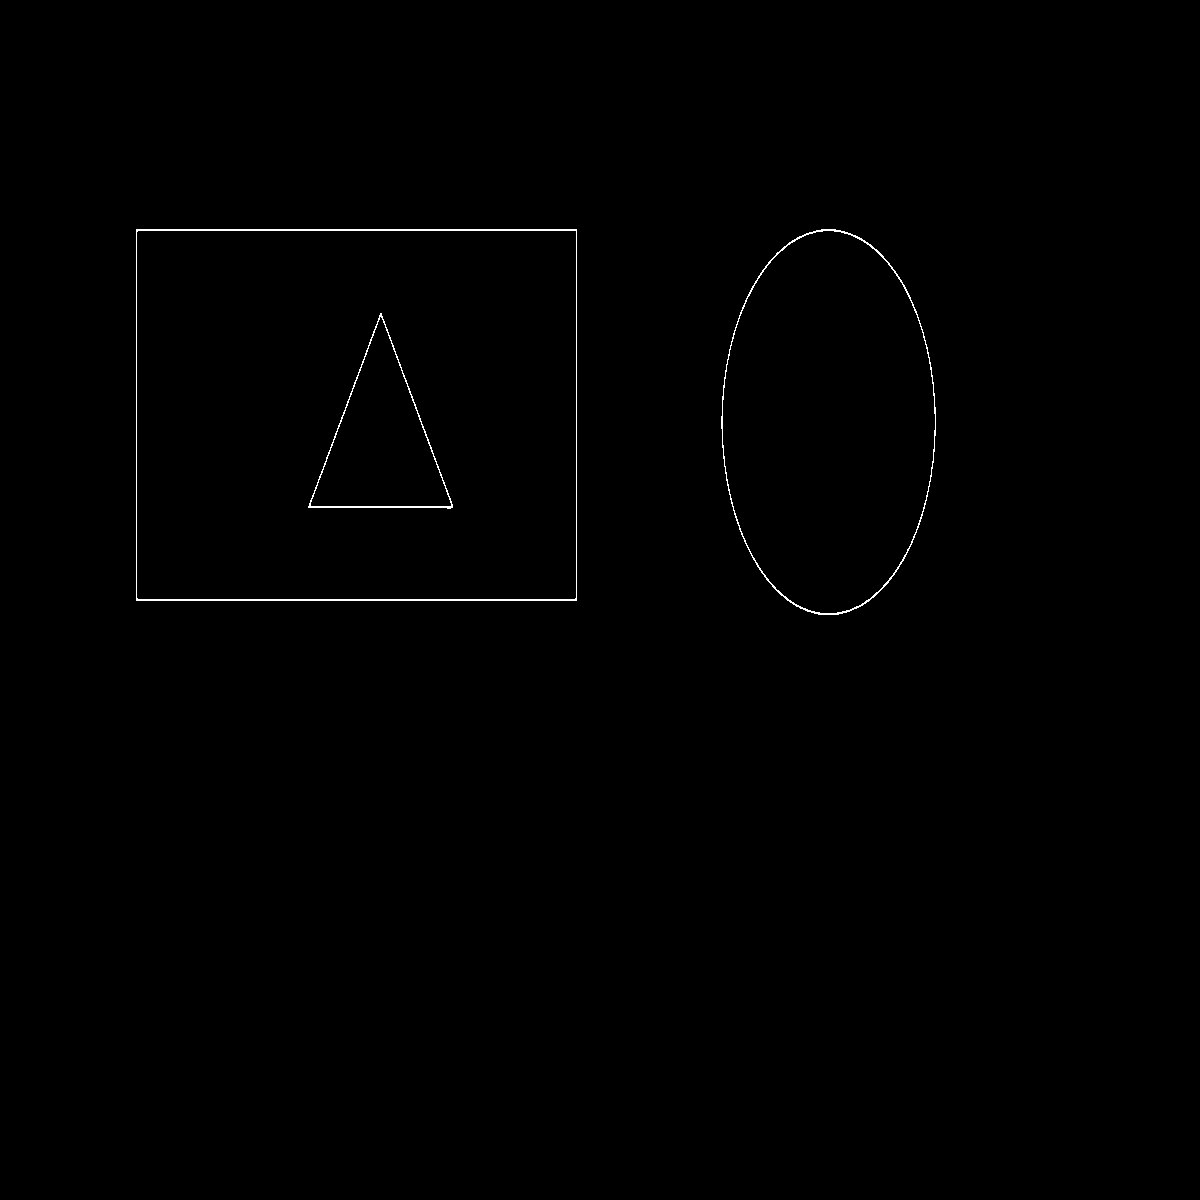

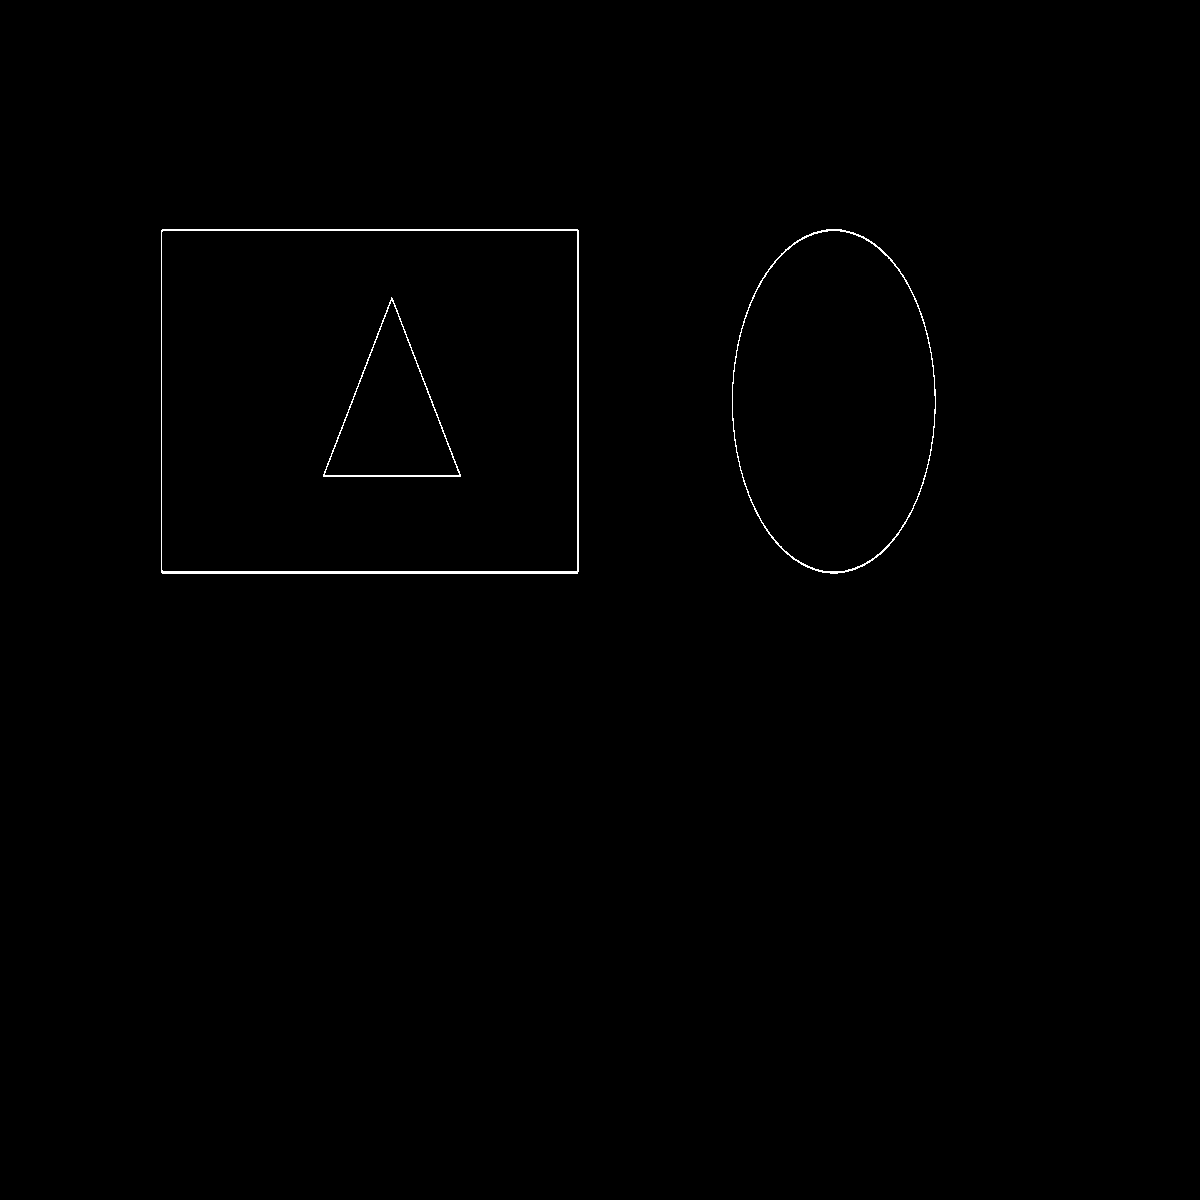

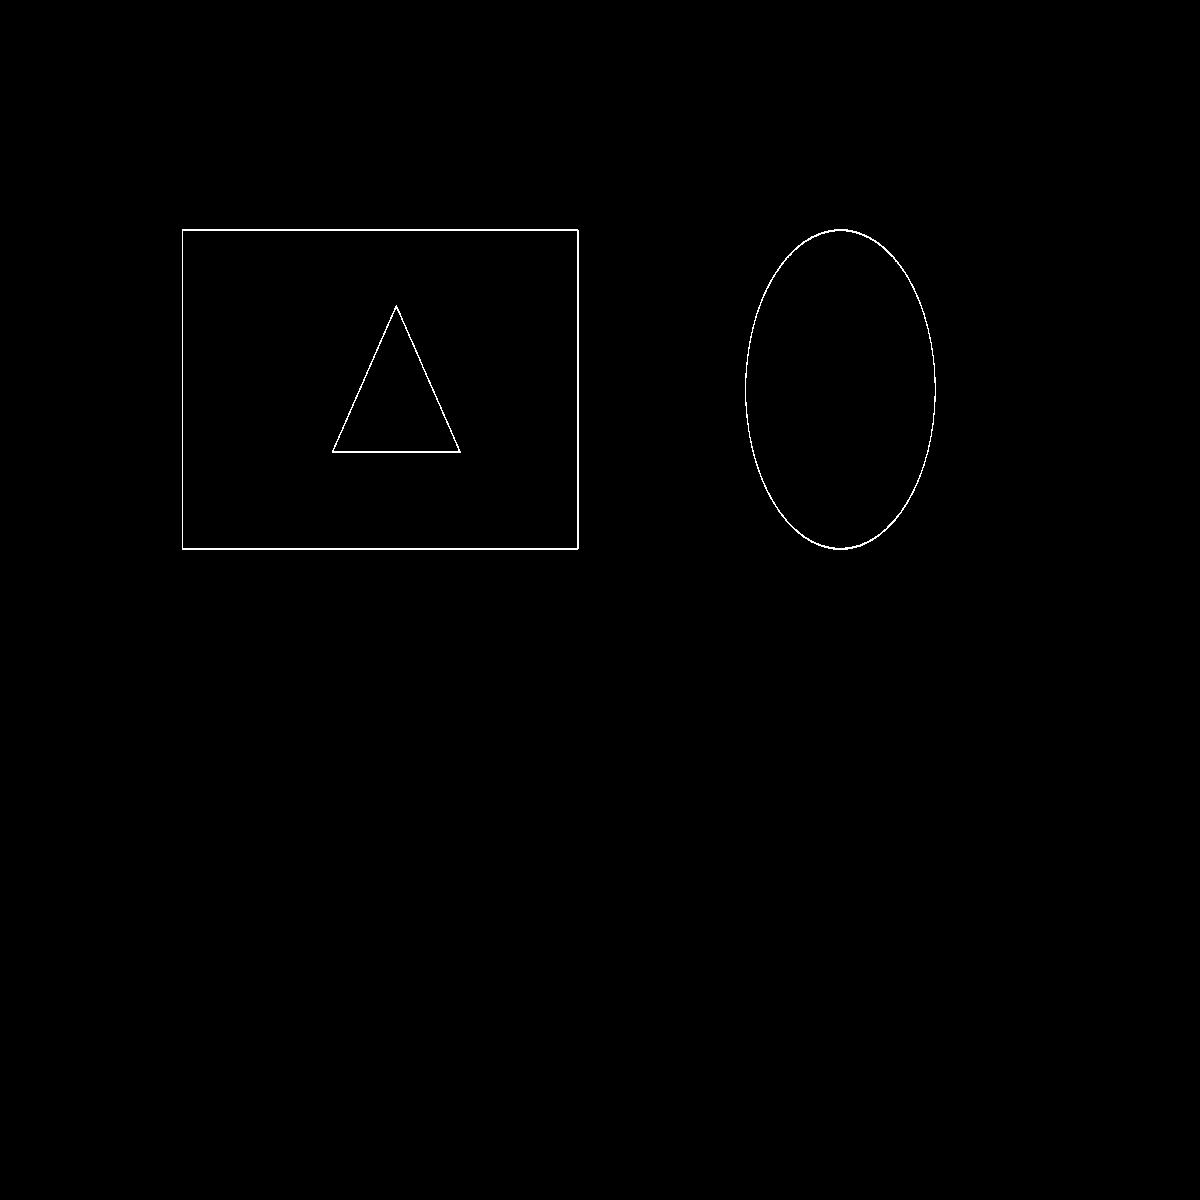

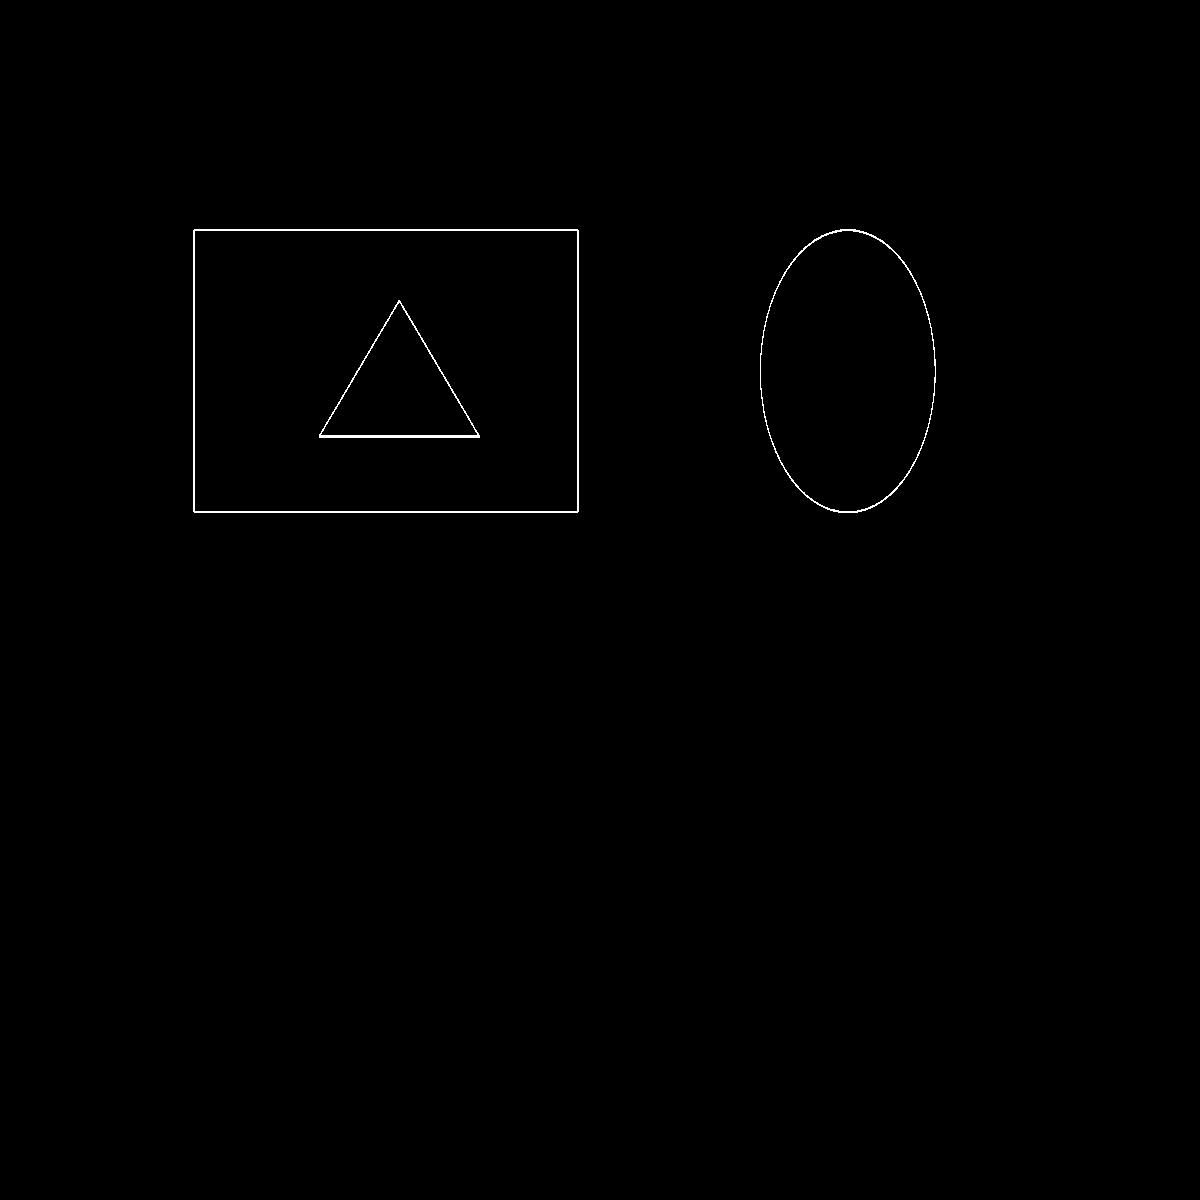

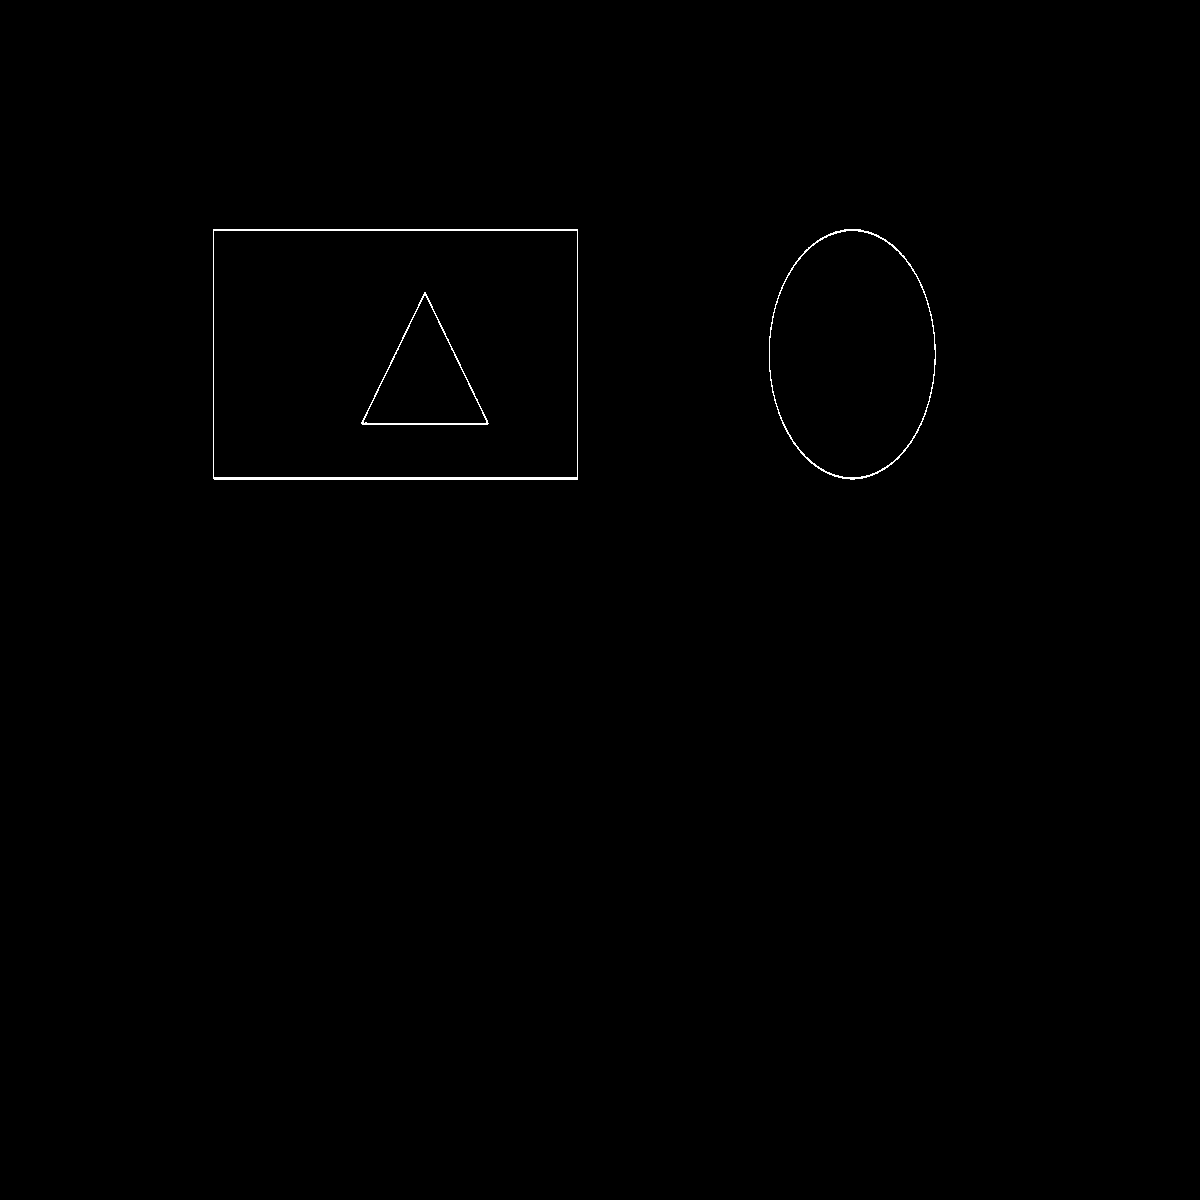

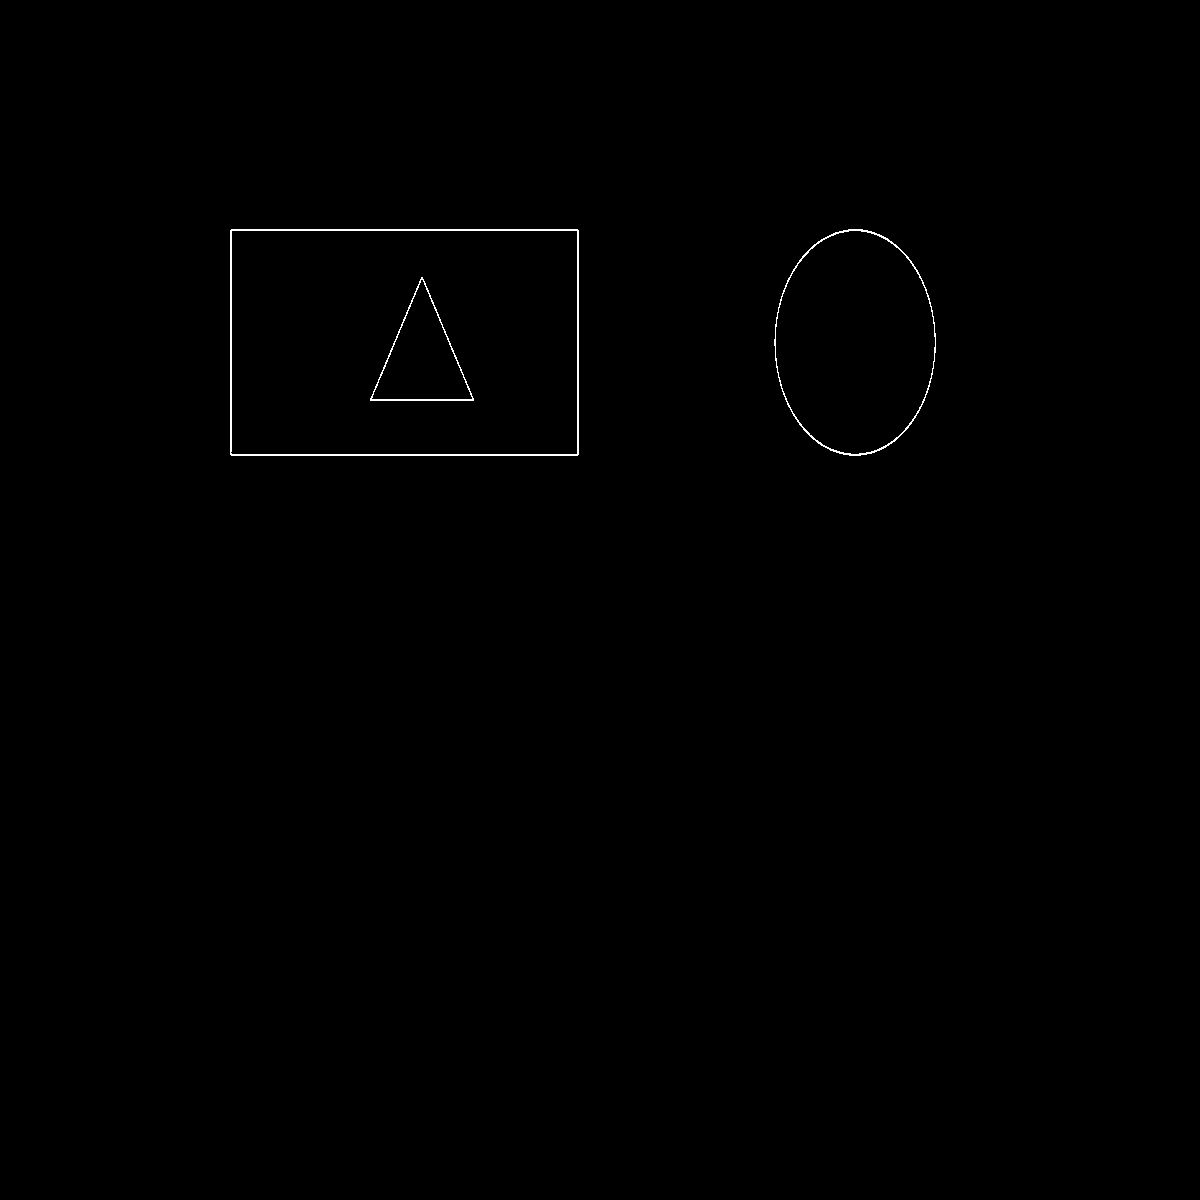

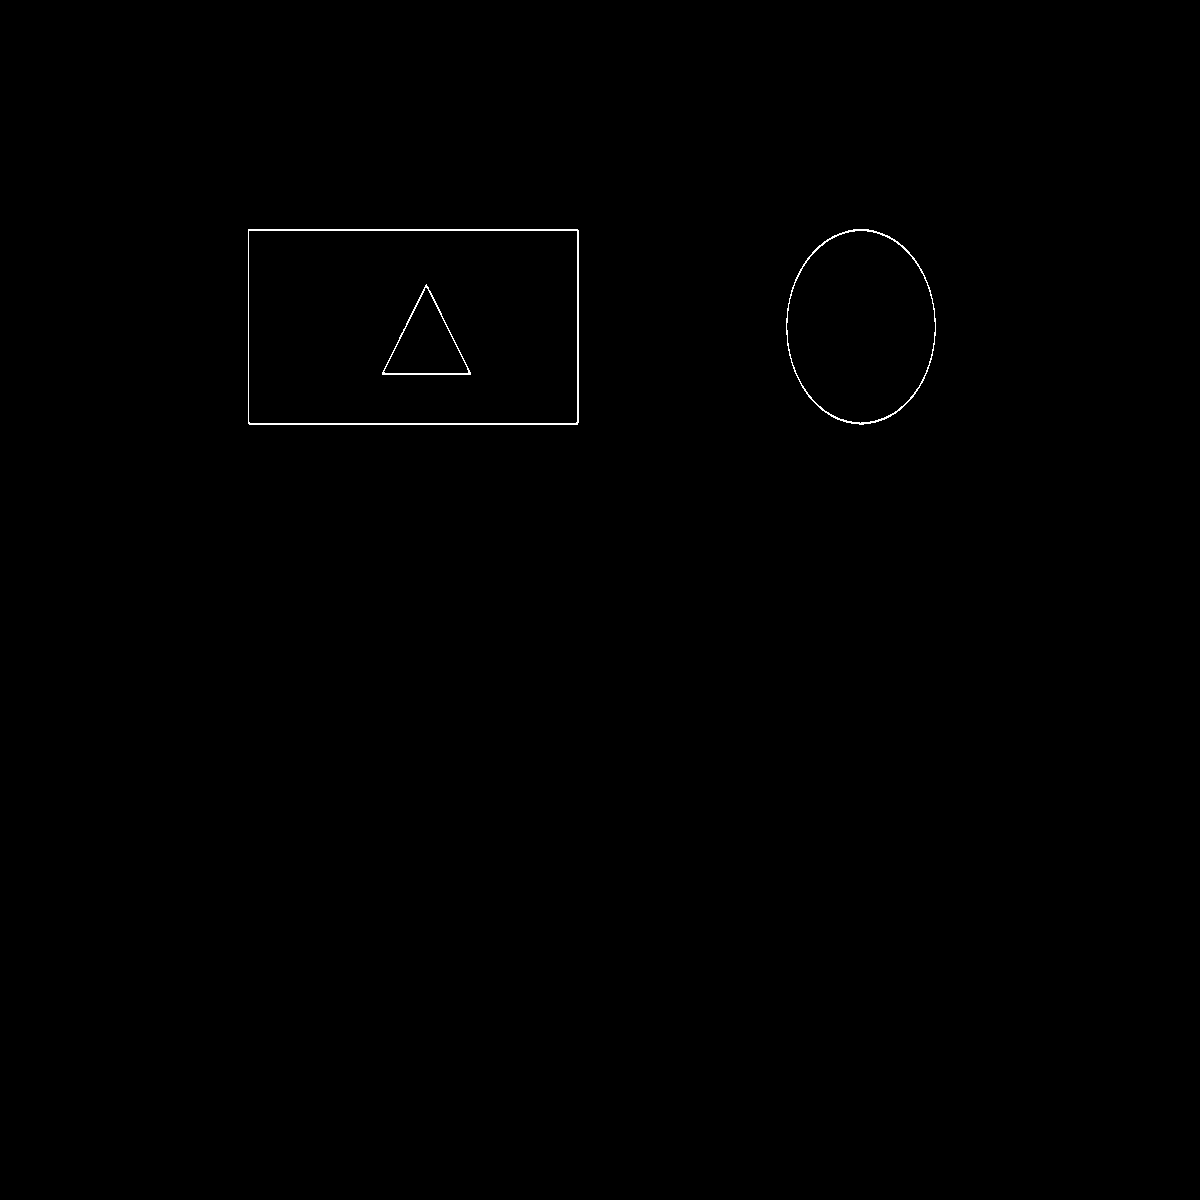

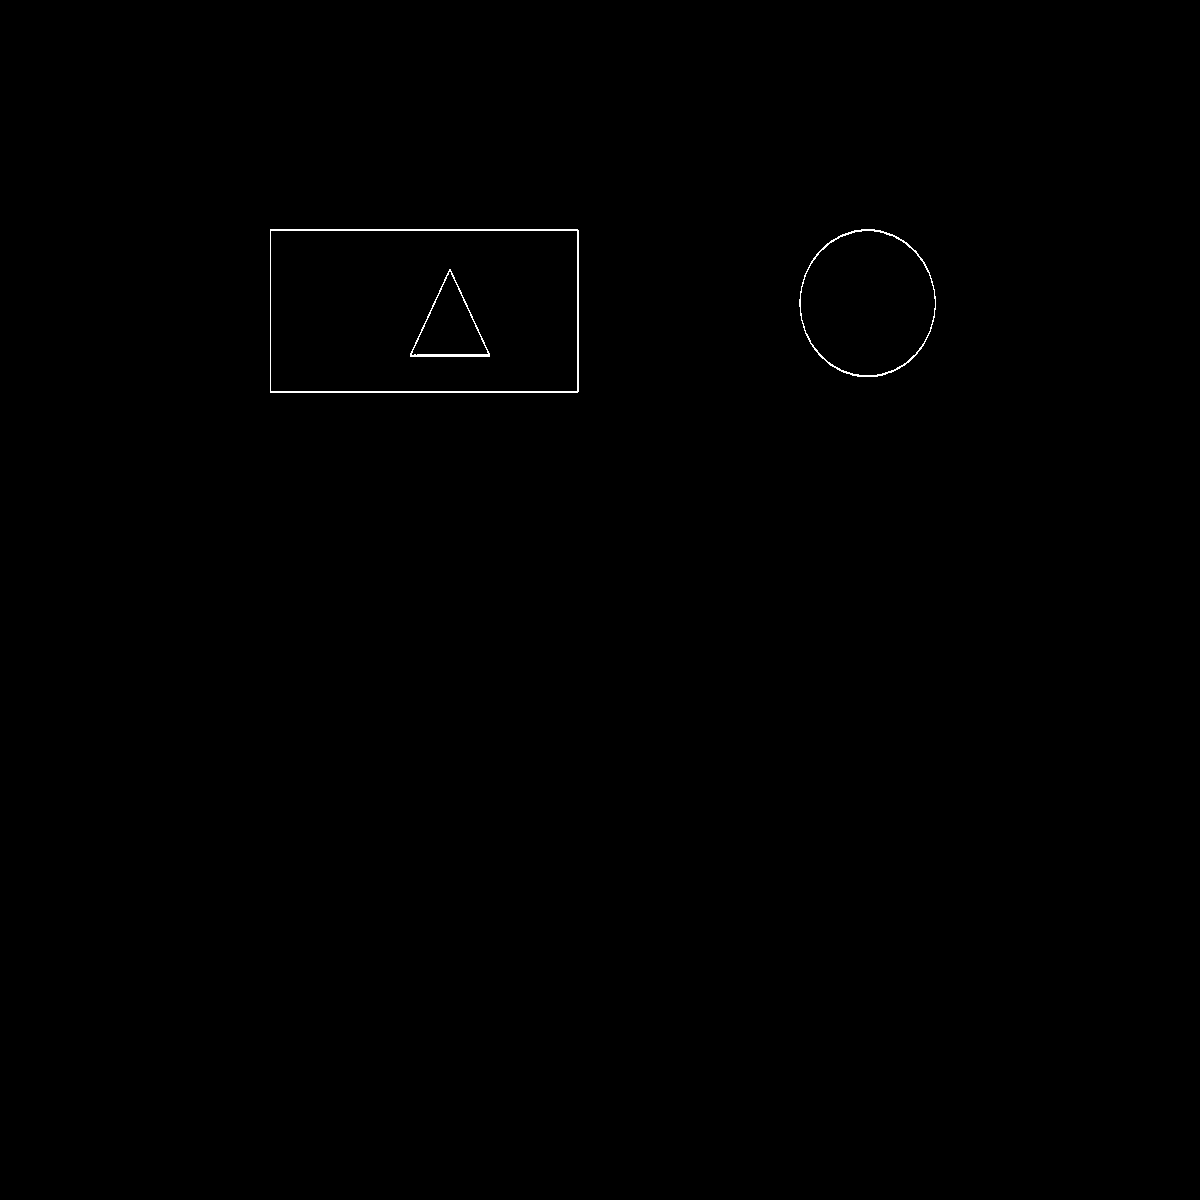

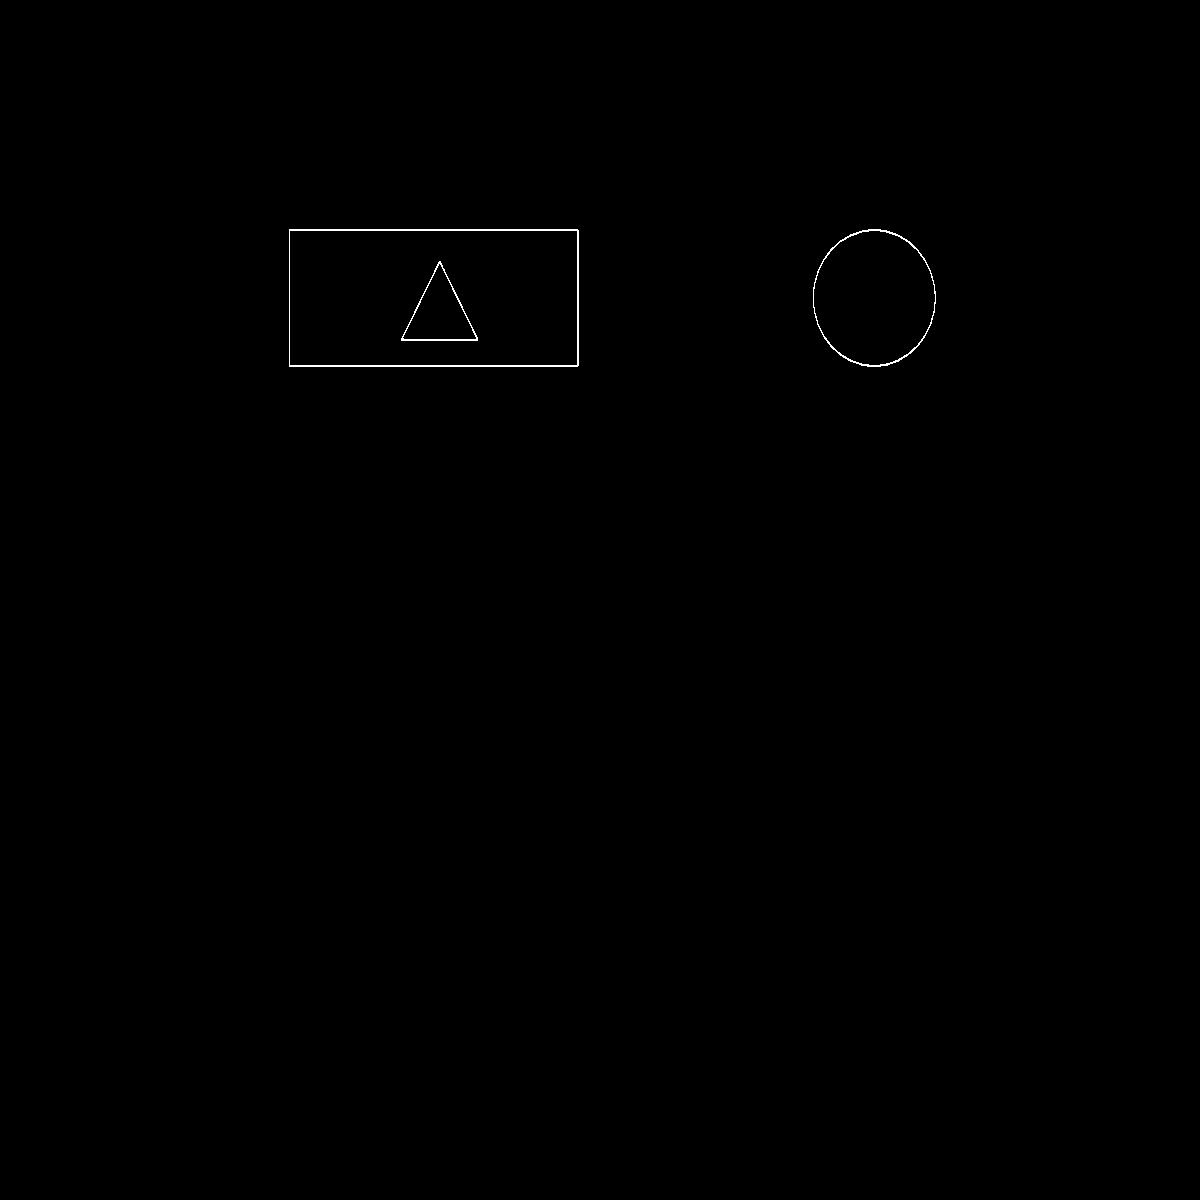

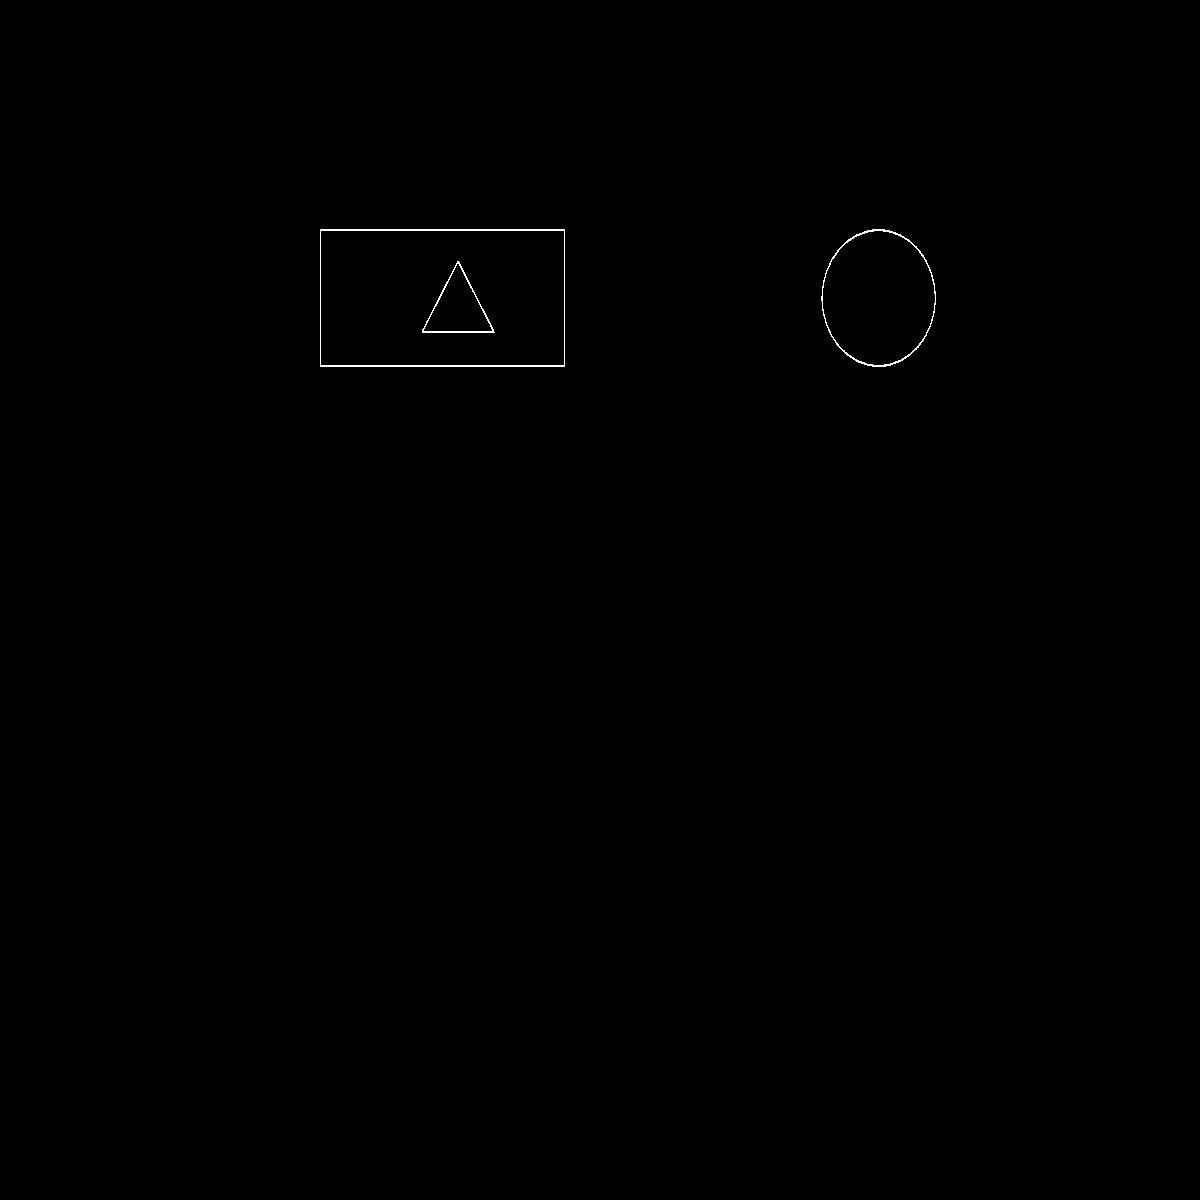

Index: 1 of 13
Index: 2 of 13
Index: 3 of 13
Index: 4 of 13
Index: 5 of 13
Index: 6 of 13
Index: 7 of 13
Index: 8 of 13
Index: 9 of 13
Index: 10 of 13
Index: 11 of 13
(44706, 3)
Point: 1000 of 44706
Point: 2000 of 44706
Point: 3000 of 44706
Point: 4000 of 44706
Point: 5000 of 44706
Point: 6000 of 44706
Point: 7000 of 44706
Point: 8000 of 44706
Point: 9000 of 44706
Point: 10000 of 44706
Point: 11000 of 44706
Point: 12000 of 44706
Point: 13000 of 44706
Point: 14000 of 44706
Point: 15000 of 44706
Point: 16000 of 44706
Point: 17000 of 44706
Point: 18000 of 44706
Point: 19000 of 44706
Point: 20000 of 44706
Point: 21000 of 44706
Point: 22000 of 44706
Point: 23000 of 44706
Point: 24000 of 44706
Point: 25000 of 44706
Point: 26000 of 44706
Point: 27000 of 44706
Point: 28000 of 44706
Point: 29000 of 44706
Point: 30000 of 44706
Point: 31000 of 44706
Point: 32000 of 44706
Point: 33000 of 44706
Point: 34000 of 44706
Point: 35000 of 44706
Point: 36000 of 44706
Point: 37000 of 44706
Point: 38000 of 4

In [8]:
import cv2
import math
import numpy as np
import os
from google.colab.patches import cv2_imshow 

# creates a point cloud file (.ply) from numpy array
def createPointCloud(filename, arr):
    # open file and write boilerplate header
    file = open(filename, 'w');
    file.write("ply\n");
    file.write("format ascii 1.0\n");

    # count number of vertices
    num_verts = arr.shape[0];
    file.write("element vertex " + str(num_verts) + "\n");
    file.write("property float32 x\n");
    file.write("property float32 y\n");
    file.write("property float32 z\n");
    file.write("end_header\n");

    # write points
    point_count = 0;
    for point in arr:
        # progress check
        point_count += 1;
        if point_count % 1000 == 0:
            print("Point: " + str(point_count) + " of " + str(len(arr)));

        # create file string
        out_str = "";
        for axis in point:
            out_str += str(axis) + " ";
        out_str = out_str[:-1]; # dump the extra space
        out_str += "\n";
        file.write(out_str);
    file.close();


# extracts points from mask and adds to list
def addPoints(mask, points_list, depth):
    mask_points = np.where(mask == 255);
    for ind in range(len(mask_points[0])):
        # get point
        x = mask_points[1][ind];
        y = mask_points[0][ind];
        point = [x,y,depth];
        points_list.append(point);

def main():
    # tweakables
    slice_thickness = 10; #should be small for more images, distance between slices
    xy_scale = 1; # rescale of xy distance

    # load images
    folder = "images2/";
    folder = "/content/images2/"
    files = os.listdir(folder);
    files.sort()
    images = [];
    print("ddddddfdgdgdfdgjkhskybdfskd",files)
    for file in files:
        if file[-4:] == ".jpg":
            print(folder + file)
            img = cv2.imread(folder + file, cv2.IMREAD_GRAYSCALE);
            print(img.shape)
            img = cv2.resize(img, (1200, 1200)); # change here for more or less resolution
            images.append(img);

    # keep a blank mask
    blank_mask = np.zeros_like(images[0], np.uint8);

    # create masks
    masks = [];
    masks.append(blank_mask);
    for image in images:
        # mask
        mask = cv2.inRange(image, 0, 150);

        # show
        cv2_imshow(mask);
        cv2.waitKey(1);
        masks.append(mask);
    masks.append(blank_mask);
    cv2.destroyAllWindows();

    # go through and get points
    depth = 0;
    points = [];
    for index in range(1,len(masks)-1):
        # progress check
        print("Index: " + str(index) + " of " + str(len(masks)));

        # get three masks
        prev = masks[index - 1];
        curr = masks[index];
        after = masks[index + 1];

        # do a slice on previous
        prev_mask = np.zeros_like(curr);
        prev_mask[prev == 0] = curr[prev == 0];
        addPoints(prev_mask, points, depth);

        # # do a slice on after
        next_mask = np.zeros_like(curr);
        next_mask[after == 0] = curr[after == 0];
        addPoints(next_mask, points, depth);

        # get contour points (_, contours) in OpenCV 2.* or 4.*
        contours,_ = cv2.findContours(curr, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE);
        for con in contours:
            for point in con:
                p = point[0]; # contours have an extra layer of brackets
                points.append([p[0], p[1], depth]);

        # increment depth
        depth += slice_thickness;

    # rescale x,y points
    for ind in range(len(points)):
        # unpack
        x,y,z = points[ind];

        # scale
        x *= xy_scale;
        y *= xy_scale;
        points[ind] = [x,y,z];

    # convert points to numpy and dump duplicates
    points = np.array(points).astype(np.float32);
    points = np.unique(points.reshape(-1, points.shape[-1]), axis=0);
    print(points.shape);

    # save to point cloud file
    createPointCloud("test.ply", points);

if __name__ == "__main__":
    main();

In [ ]:
#!pip install open3d

In [ ]:
import numpy as np
import open3d as o3d
# from open3d import *
# to do later